In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'oliverkim3083' # username
os.environ['KAGGLE_KEY'] = '63186cfe3528c7ff36943d6b10438886' # key

In [2]:
!kaggle datasets download -d kandij/diabetes-dataset
!unzip diabetes-dataset.zip

  0% 0.00/8.92k [00:00<?, ?B/s]
100% 8.92k/8.92k [00:00<00:00, 3.37MB/s]
Archive:  diabetes-dataset.zip
  inflating: diabetes2.csv           


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def countplt_fn(x,y,series,xsize,ysize,xtick):
  plt.figure(figsize=(xsize,ysize))
  sns.countplot(series[x], hue=series[y])
  plt.xticks(rotation=xtick)
  plt.show

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [4]:
df = pd.read_csv('diabetes2.csv')

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
x_data = df.drop(columns=['Outcome'], axis=1) # y인 Outcome 제외한 채로 데이터 변형
x_data = x_data.astype(np.float32) # 데이터 타입 소수형으로 변형

x_data.head(5) # 미리보기

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.599998,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,33.0


In [7]:
y_data = df[['Outcome']] # y인 Outcome 제외한 채로 데이터 변형
y_data = y_data.astype(np.float32) # 데이터 타입 소수형으로 변형

y_data.head(5) # 미리보기

,Outcome
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


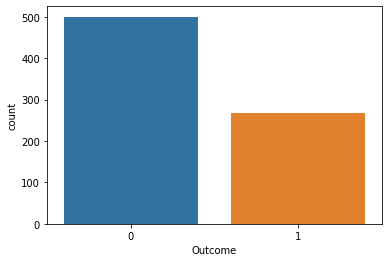

In [10]:
sns.countplot(x=df['Outcome']) # y데이터 갯수 확인

In [11]:
print(df.isnull().sum()) # 비어있는 칸있는지 확인

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [12]:
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data)

print(x_data.values[0]) # 표준화 하기 전
print(x_data_scaled[0]) # 표준화 한 후

[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
[ 0.6399473   0.8483238   0.14964075  0.90726995 -0.6928905   0.20401257
  0.46849188  1.4259955 ]


In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(614, 8) (154, 8)
(614, 1) (154, 1)


In [32]:
model = Sequential([
  Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

results = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=20 # epochs 복수형으로 쓰기!
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
20/20 [==============================] - 1s 9ms/step - loss: 18.9043 - acc: 0.4055 - val_loss: 6.5186 - val_acc: 0.5584
Epoch 2/20
20/20 [==============================] - 0s 2ms/step - loss: 6.5028 - acc: 0.5814 - val_loss: 5.1756 - val_acc: 0.4805
Epoch 3/20
20/20 [==============================] - 0s 2ms/step - loss: 4.8379 - acc: 0.4609 - val_loss: 4.4528 - val_acc: 0.5130
Epoch 4/20
20/20 [==============================] - 0s 2ms/step - loss: 4.0273 - acc: 0.4739 - val_loss: 3.9343 - val_acc: 0.5519
Epoch 5/20
20/20 [==============================] - 0s 2ms/step - loss: 3.1971 - acc: 0.5033 - val_loss: 2.8227 - val_acc: 0.5260
Epoch 6/20
20/20 [==============================] - 0s 3ms/step - loss: 2.3970 - acc: 0.5147 - val_loss: 2.1962 - val_acc: 0.5260
Epoch 7/20
20/20 [==============================] - 0s 3ms/step - loss: 1.9625 - acc: 0.5554 - val_loss: 1.7983 - val_acc: 0.5195
Epoch 8/20
20/20 [==============================] - 0s 2ms/step - loss: 1.6455 - acc: 0.5

In [27]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
Y_pred = LR.predict(x_val)
print("Accuracy of Logistic Regression Model is {:.2f}".format(LR.score(x_val,y_val)))

Accuracy of Logistic Regression Model is 0.77


In [29]:
y_train = y_train.values.reshape(-1,1)
y_val = y_val.values.reshape(-1,1)

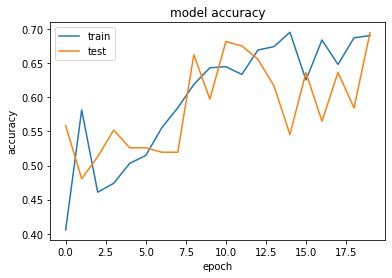

In [33]:
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()